In [116]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

In [117]:
# Load the dataset
data = pd.read_csv('Mall_Customers.csv')
# Drop irrelevant columns (CustomerID) or handle missing values
data = data.drop('CustomerID', axis=1) 
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [118]:
# Convert Gender to numerical values (e.g., 0 for Male, 1 for Female)
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

In [119]:
# Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

KMeans clustering is performed on the data before outlier removal, and the results are visualized.

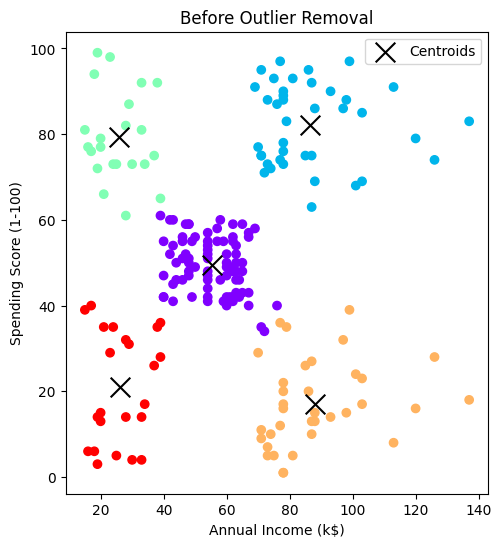

In [120]:
# Perform KMeans clustering before outlier removal on original unscaled data
kmeans_before = KMeans(n_clusters=5, init='k-means++', random_state=42)
data['Cluster'] = kmeans_before.fit_predict(data[['Annual Income (k$)', 'Spending Score (1-100)']])

# Determine centroids from the original unscaled data
centroids_before = kmeans_before.cluster_centers_

# Plotting the clusters before outlier removal including centroids
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='rainbow')
plt.scatter(centroids_before[:, 0], centroids_before[:, 1], marker='x', s=200, color='black', label='Centroids')
plt.title('Before Outlier Removal')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()


In [121]:
# Detect outliers using Isolation Forest
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
outlier_mask = isolation_forest.fit_predict(scaled_data)

The data without outliers is filtered and KMeans clustering is performed again.

In [122]:
# Add outlier label to the original dataset
data['Outlier'] = outlier_mask

# Filter out outliers
filtered_data = data[data['Outlier'] == 1]

# Perform KMeans clustering on filtered data
kmeans_data = filtered_data.drop(['Outlier', 'Cluster'], axis=1)
scaled_kmeans_data = scaler.fit_transform(kmeans_data)

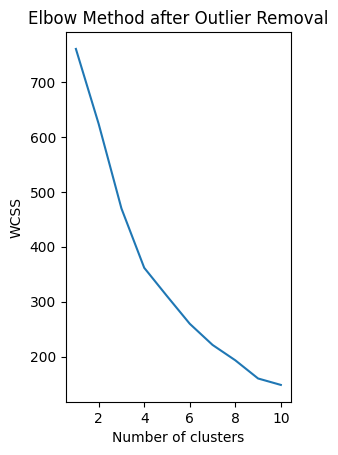

In [123]:
# Determine optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_kmeans_data)
    wcss.append(kmeans.inertia_)
plt.subplot(1, 2, 2)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method after Outlier Removal')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the Elbow Method, choose the optimal number of clusters

In [124]:
# Alternatively, you can analyze the clusters by their centroids
centroids = scaler.inverse_transform(kmeans_after.cluster_centers_)
centroid_df = pd.DataFrame(centroids, columns=kmeans_data.columns)
print("Cluster Centroids:")
print(centroid_df)

Cluster Centroids:
         Gender        Age  Annual Income (k$)  Spending Score (1-100)
0  1.000000e+00  50.577778           53.000000               37.066667
1  1.110223e-16  29.333333           71.133333               71.266667
2  7.333333e-01  26.866667           28.733333               69.100000
3 -3.330669e-16  49.232558           62.279070               31.511628
4  1.000000e+00  30.333333           79.071429               61.595238


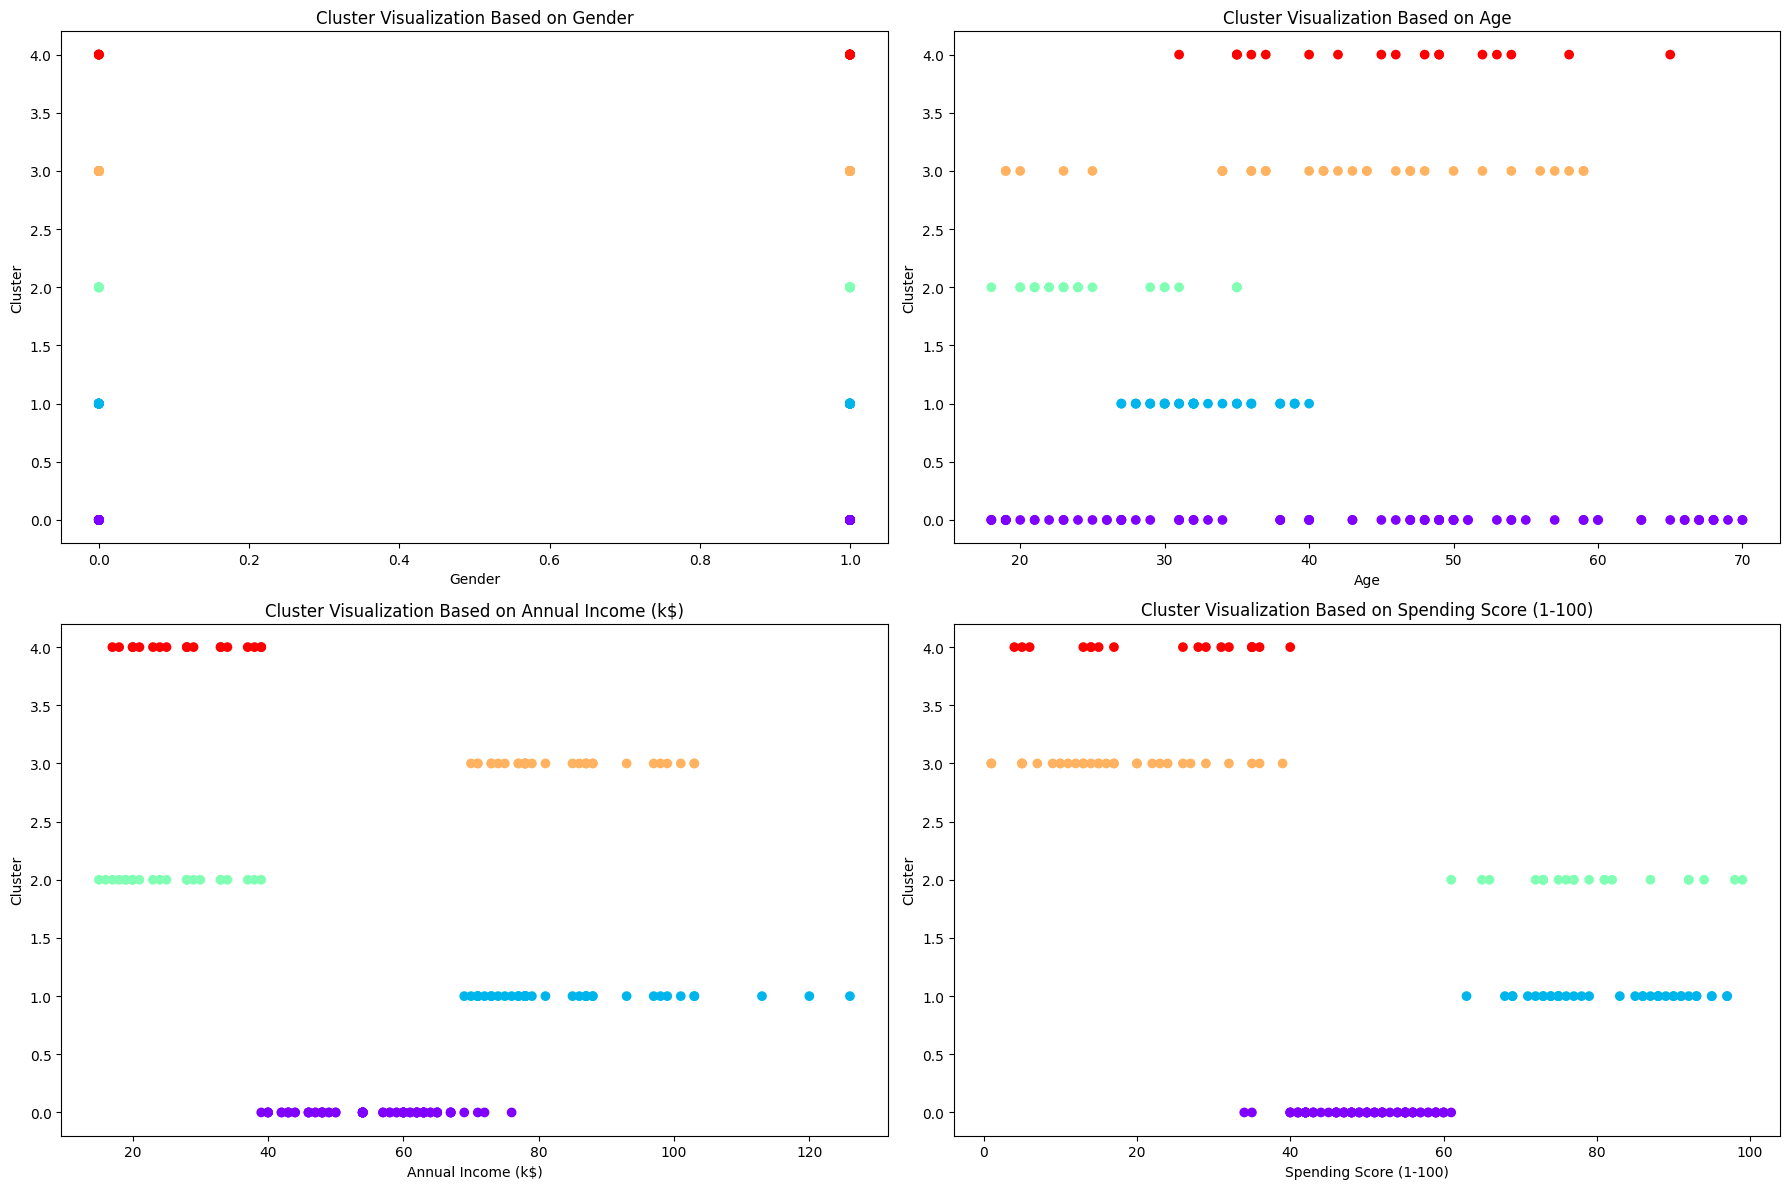

In [125]:
# Create individual scatter plots for each feature against clusters
features = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
plt.figure(figsize=(18, 12))

for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    plt.scatter(filtered_data[feature], filtered_data['Cluster'], c=filtered_data['Cluster'], cmap='rainbow')
    plt.title(f'Cluster Visualization Based on {feature}')
    plt.xlabel(feature)
    plt.ylabel('Cluster')

plt.tight_layout()
plt.show()